In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [4]:

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [6]:
X.shape


(100, 2)

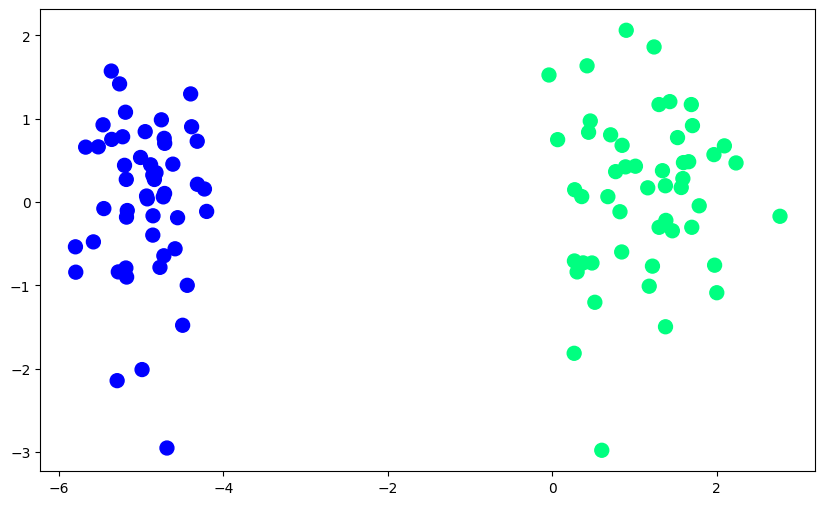

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [13]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

D:\new folder\envs\py312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [14]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [59]:
def LR_gd(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.5

    for i in range(2500):
        j=np.random.randint(0,100)
        y_hat=sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
    return weights[1:],weights[0]

In [60]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [61]:
coef_,intercept_ = LR_gd(X,y)

In [62]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [63]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

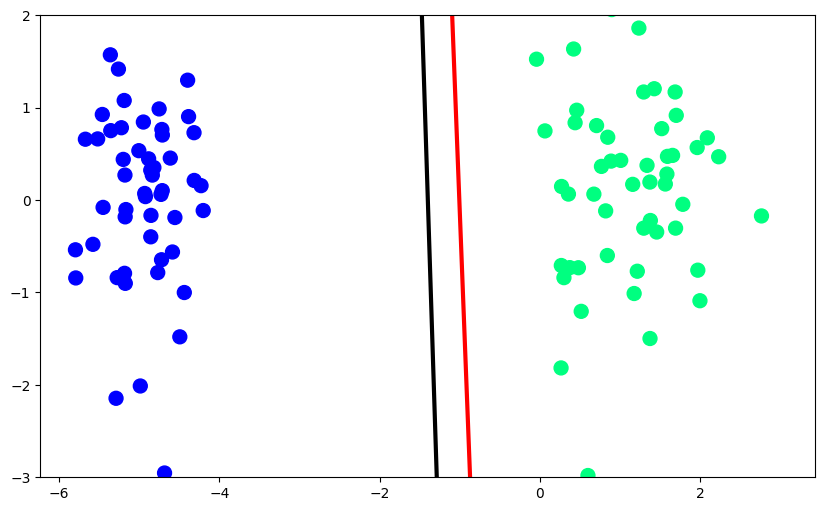

In [64]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)